In [47]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.nn import MaxPool2d,Conv2d,Linear,ReLU,BatchNorm2d,BatchNorm1d
from torch import optim

In [75]:


IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [79]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(16,16), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [80]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=composed)
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=composed
                                               )  


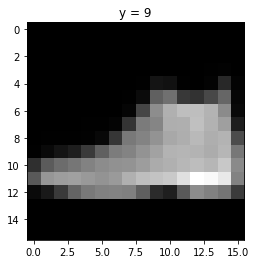

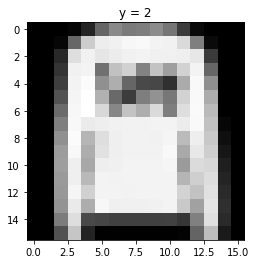

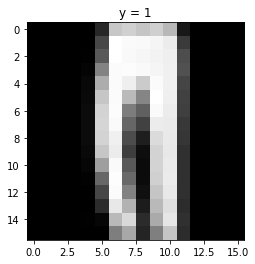

In [96]:
for n,data_sample in enumerate(test_set):

    show_data(data_sample)
    plt.show()
    if n==2:
        break

In [82]:
class model1(nn.Module):
  def __init__(self,out_1=16, out_2=32):
    super(model1, self).__init__()
    self.layer1=Conv2d(in_channels=1, out_channels=out_1,kernel_size=5, padding=2)
    self.batch1=BatchNorm2d(out_1)
    self.max1=MaxPool2d(kernel_size=2)
    
    self.layer2=Conv2d(in_channels=out_1, out_channels=out_2,kernel_size=5, padding=2)
    self.batch2=BatchNorm2d(out_2)
    self.max2=MaxPool2d(kernel_size=2)
    
    self.layer3=Linear(out_2*4*4,10)
    self.batch3=BatchNorm1d(10)
  
  def forward(self,x):
    x=self.layer1(x)
    x=self.batch1(x)
    x=torch.relu(x)
    x=self.max1(x)
                
    x=self.layer2(x)
    x=self.batch2(x)
    x=torch.relu(x)
    x=self.max2(x)
    
    x = x.view(x.size(0), -1)
    
    x=self.layer3(x)
    x=self.batch3(x)
    
    return x

In [83]:
model = model1(out_1=16, out_2=32)

In [84]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=100)

In [85]:

n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(test_set)
COST=0
for epoch in range(0,n_epochs):
    COST=0
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        COST+=loss.data
        
    cost_list.append(COST)
    correct=0
        #perform a prediction on the validation  data  
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)

In [86]:
print(accuracy_list)
print(COST)

[0.8598, 0.8682, 0.8754, 0.8767, 0.8779, 0.8786, 0.8796, 0.8826, 0.8808, 0.883]
tensor(134.2181)


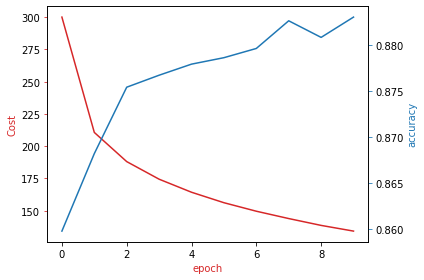

In [87]:
a, b = plt.subplots()
color = 'tab:red'
b.plot(cost_list, color=color)
b.set_xlabel('epoch', color=color)
b.set_ylabel('Cost', color=color)
b.tick_params(axis='y', color=color)
    
c = b.twinx()  
color = 'tab:blue'
c.set_ylabel('accuracy', color=color) 
c.set_xlabel('epoch', color=color)
c.plot( accuracy_list, color=color)
c.tick_params(axis='y', color=color)
a.tight_layout()